In [10]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\aravindhan\Desktop\Python_Projects\train_ctrUa4K.csv')

In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.fillna({'Gender':data['Gender'].mode()[0],'Married':data['Married'].mode()[0],'Self_Employed':data['Self_Employed'].mode()[0],'Dependents':data['Dependents'].mode()[0]},inplace=True)

In [5]:
data.fillna(data.mean(),inplace=True)

In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
%matplotlib inline
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014ABE06D860>,
      dtype=object)

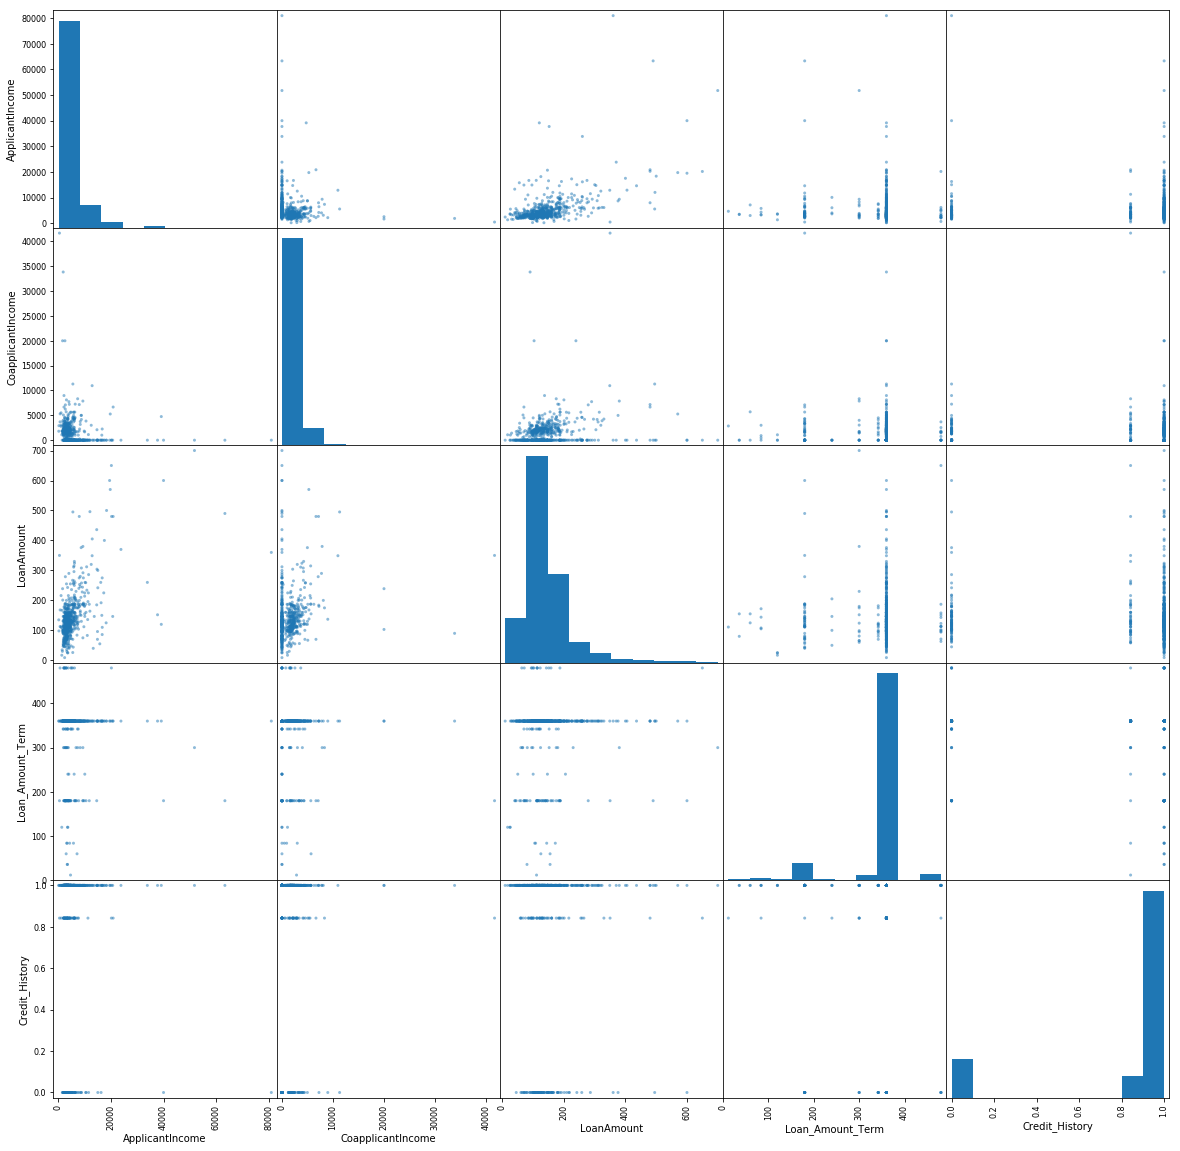

In [9]:
scatter_matrix(data,figsize=(20,20))

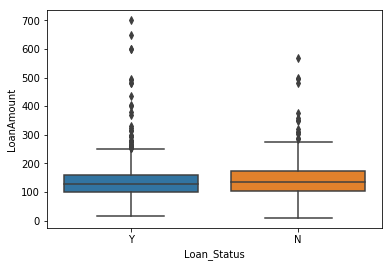

In [17]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=data)

In [18]:
le=LabelEncoder()
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [19]:
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
tree=RandomForestClassifier()
svm=SVC(gamma=0.8,C=10)
lo=LogisticRegression(C=100)

In [23]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(data.iloc[:,0:12],data.iloc[:,12:],random_state=40)

In [35]:
tree.fit(xtrain,ytrain)
svm.fit(xtrain,ytrain)
lo.fit(xtrain,ytrain)

C:\Users\aravindhan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aravindhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\aravindhan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aravindhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Us

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
a=tree.predict(xtest)
b=svm.predict(xtest)
c=lo.predict(xtest)

In [37]:
confusion_matrix(ytest,a)

array([[ 20,  23],
       [ 10, 101]], dtype=int64)

In [38]:
confusion_matrix(ytest,b)

array([[  0,  43],
       [  0, 111]], dtype=int64)

In [39]:
confusion_matrix(ytest,c)

array([[ 15,  28],
       [  2, 109]], dtype=int64)